In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:
spectra = "D:/3x injection.mzML"

plate_map = "C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/3x injection.xlsx"

In [4]:
eng.load_mzml(spectra, clear_hdf5=True)

Reading mzML: D:/3x injection.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:/3x injection.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


False

1070 2
Noise Level: 0.03357343719702872 Window: 0.6
1.0312 0.13711000000000007
1.95747 0.1411800000000003
2.88835 0.13712999999999997
4.23498 0.6733000000000002
Bad Peak [5.02062    0.03889817] 0.26602000000000015 [4.77123, 5.03725]
Getting scans: [98, 131]
Length merge axis: 28911
Getting scans: [321, 355]
Length merge axis: 30285
Getting scans: [545, 578]
Length merge axis: 31335


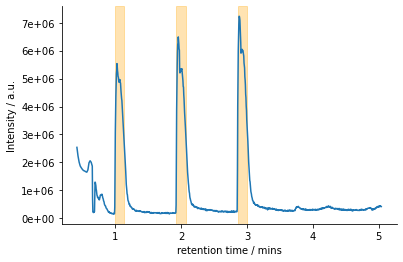

In [5]:
eng.config.chrom_peak_width = 0.6
eng.get_chrom_peaks(lb = 1, ub = 4) 
eng.add_chrom_peaks2() 
eng.plot_tic(peak_windows = True)

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

In [6]:
eng.update_config(masslb = 5000, massub = 16000, peakthresh = 0.05)
eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.1295845
Execution Time: 6.0511205
Execution Time: 0.19164349999999963
Peak info saved to: D:/UniDec_Figures_and_Files\3x injection_extracts.txt


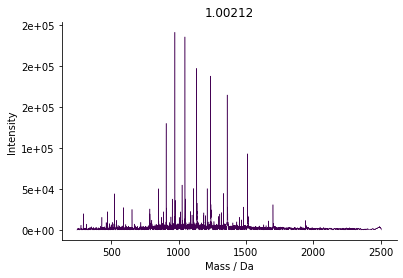

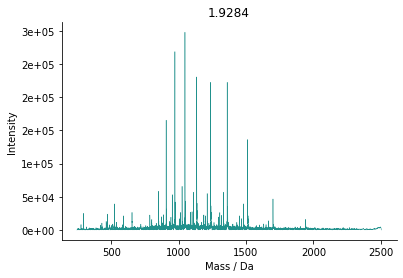

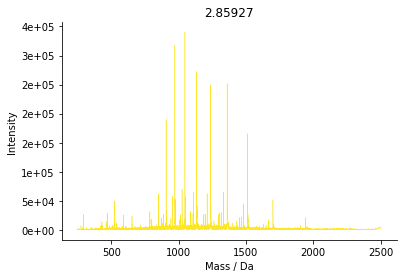

In [7]:
eng.plot_all(dtype = 'data2', combine = False, cmap = 'viridis')

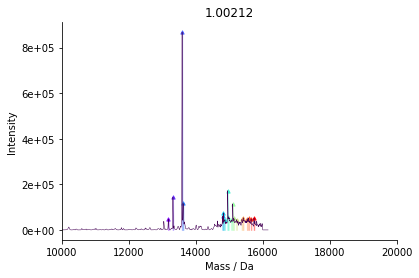

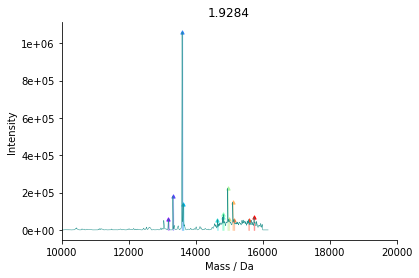

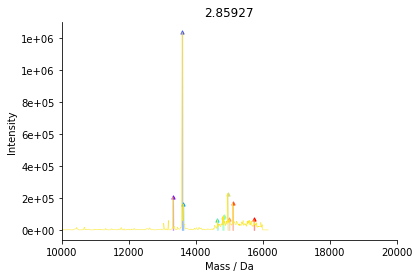

In [8]:
eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [10000, 20000])

In [9]:
eng.upload_map(plate_map)

(  Reaction    Species  Concentration Units     Mass Reagent_Type Sequence
 0       3x  Species 1          100.0    uM  13322.0      Protein      NaN
 1       3x  Species 2            NaN    uM  13595.0      Protein      NaN,
             Type Reaction Time  Species  Valid
 Well ID                                       
 1        Protein       3x    1      NaN   True
 2        Protein       3x    2      NaN   True
 3        Protein       3x    3      NaN   True)

In [10]:
eng.pmap

,Type,Reaction,Time,Species,Valid
Well ID,,,,,
1,Protein,3x,1,NaN,True
2,Protein,3x,2,NaN,True
3,Protein,3x,3,NaN,True


In [11]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,3x,Species 1,100.0,uM,13322.0,Protein,NaN
1,3x,Species 2,NaN,uM,13595.0,Protein,NaN


In [12]:
eng

In [13]:
eng.process_maps(groupby = 'Reaction', variable = 'Species')

In [14]:
eng.pmap2

,Type,Reaction,Time,Species,Valid,Species 1,Species 2,Spectra
Well ID,,,,,,,,
1,Protein,3x,1,"[Species 1, Species 2]",True,"<Species 1(Reaction = 3x, Species = Species 1,...","<Species 2(Reaction = 3x, Species = Species 2,...",<metaunidec.mudstruct.Spectrum object at 0x000...
2,Protein,3x,2,"[Species 1, Species 2]",True,"<Species 1(Reaction = 3x, Species = Species 1,...","<Species 2(Reaction = 3x, Species = Species 2,...",<metaunidec.mudstruct.Spectrum object at 0x000...
3,Protein,3x,3,"[Species 1, Species 2]",True,"<Species 1(Reaction = 3x, Species = Species 1,...","<Species 2(Reaction = 3x, Species = Species 2,...",<metaunidec.mudstruct.Spectrum object at 0x000...


invalidate data using eng.invalidate()

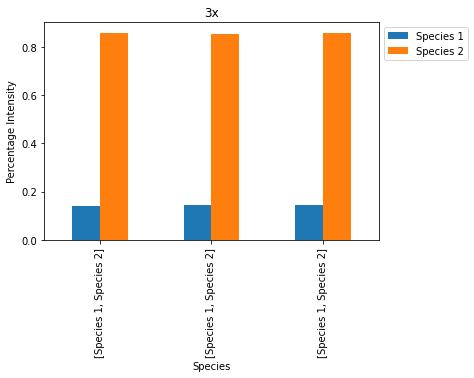

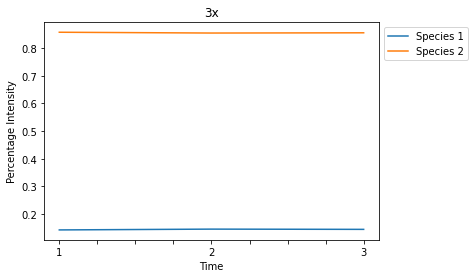

In [15]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Species')
eng.plot_data()

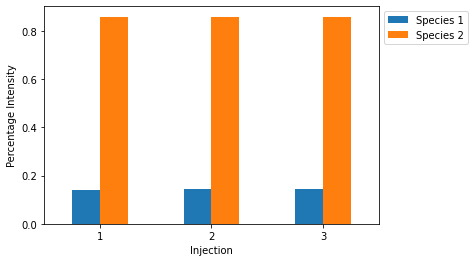

In [22]:
df = eng.data_df['3x']

df.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xlabel('Injection')
plt.ylabel('Percentage Intensity')
plt.show()